<a href="https://colab.research.google.com/github/gustavo1902/RedesNeurais/blob/main/Projeto_Final_Resolvendo_um_problema_pr%C3%A1tico_com_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 5**

Equipe:


*   Caio Eduardo Marcondes
*   Gustavo Morais Costa

**Introdução**

>Nessa atividade ...



# 1 - Base de dados

**Conjunto de dados (nome):** https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

Importando base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carregando base de dados

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ia/archive/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ia/archive/train.csv")

#data_set = pd.read_csv("/content/test.csv")
#data_set = pd.read_csv("/content/train.csv")

#data_set.drop_duplicates(inplace=True)#remove dados duplicados

# 2 - Verificando o relacionamento entre os dados

Base de dados para treino

In [ ]:
# Exibe as 5 primeiras linhas do dataset
print(train.shape)
train.head(10)

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
# 
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
# 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Base de dados para teste

In [ ]:
print(test.shape)
test.head(10)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [ ]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

In [ ]:

#substituindo strings por binário
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)



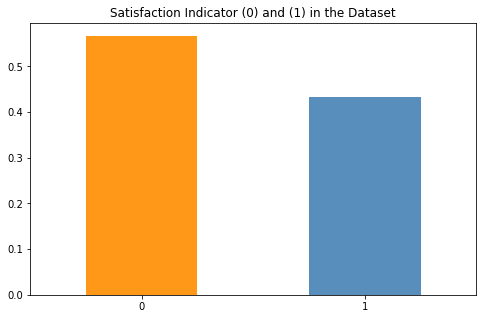

In [ ]:
#está balanceado?
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


In [ ]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [ ]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

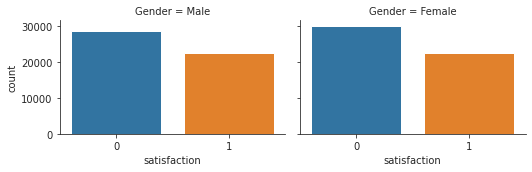

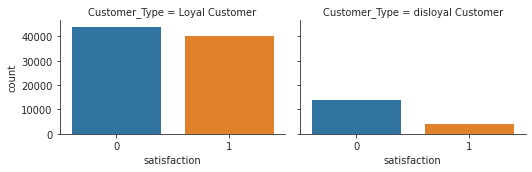

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)

# 3 - Definindo os conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Dividindo os dados em conjunto de treinamento e teste
X = train.drop(['satisfaction'], axis=1)
y = train['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificando as variáveis categóricas
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_train['Customer_Type'] = le.fit_transform(X_train['Customer_Type'])
X_train['Type_of_Travel'] = le.fit_transform(X_train['Type_of_Travel'])
X_train['Class'] = le.fit_transform(X_train['Class'])

X_test['Gender'] = le.fit_transform(X_test['Gender'])
X_test['Customer_Type'] = le.fit_transform(X_test['Customer_Type'])
X_test['Type_of_Travel'] = le.fit_transform(X_test['Type_of_Travel'])
X_test['Class'] = le.fit_transform(X_test['Class'])

# 4 - Implementação da RNA, variações e avaliações

In [ ]:
# Treinando a RNA
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

# Realizando previsões e avaliando a precisão
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9387421202059574


Curva de aprendizado

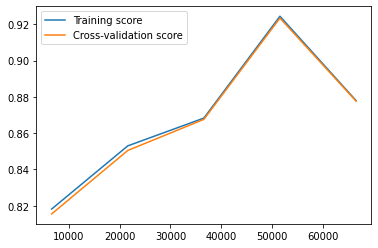

In [ ]:
# Cria o objeto do modelo
mlp = MLPClassifier()

# Define os valores para o parâmetro de treinamento (tamanho do conjunto de treinamento)
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5)

# Gráfico
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")
plt.legend()
plt.show()

Relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos

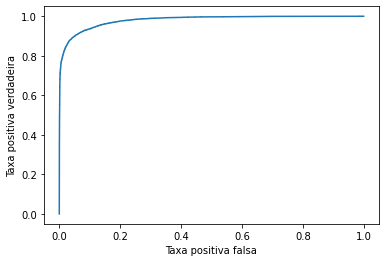

In [ ]:
# Obtém as previsões e a probabilidade de cada classe
mlp.fit(X_train, y_train)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

# Obtém as métricas da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Gráfico
plt.plot(fpr, tpr)
plt.xlabel("Taxa positiva falsa")
plt.ylabel("Taxa positiva verdadeira")
plt.show()

In [ ]:
# Variando a RNA ex.1
# Aumentando um camada oculta com 20 neurônios
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 1: ", accuracy)

Accuracy 1:  0.9386939993263077


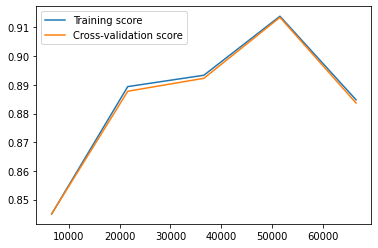

In [ ]:
# Cria o objeto do modelo
mlp = MLPClassifier()

# Define os valores para o parâmetro de treinamento (tamanho do conjunto de treinamento)
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5)

# Gráfico
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")
plt.legend()
plt.show()

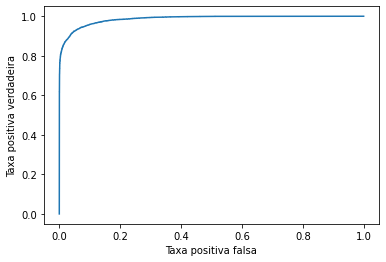

In [ ]:
# Obtém as previsões e a probabilidade de cada classe
mlp.fit(X_train, y_train)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

# Obtém as métricas da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Gráfico
plt.plot(fpr, tpr)
plt.xlabel("Taxa positiva falsa")
plt.ylabel("Taxa positiva verdadeira")
plt.show()

# 5 - Avaliando o impacto das mudanças realizadas nos parâmetros, na etapa anterior, no desempenho da RNA no problema escolhido.

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     47166
           1       0.95      0.90      0.93     35957

    accuracy                           0.94     83123
   macro avg       0.94      0.93      0.94     83123
weighted avg       0.94      0.94      0.94     83123



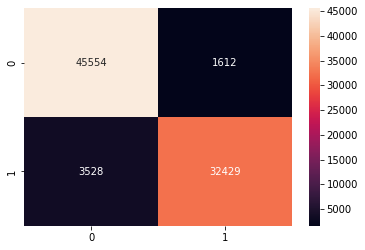

In [ ]:
#adaptar

#--------------------------------------------------
# Uma vez que as previsões são geradas, podemos avaliar o desempenho do modelo. 
#--------------------------------------------------
#Aslinhas de código abaixo imprimem a matriz de confusão e os 
#resultados do relatório de confusão nos dados de treinamento.
#--------------------------------------------------
#Desempenho conjunto de treinamento
cm = confusion_matrix(y_train,predict_train)
sns.heatmap(cm,annot=True,fmt="d") 
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11713
           1       0.96      0.90      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.94     20781
weighted avg       0.94      0.94      0.94     20781



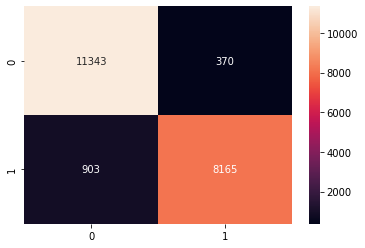

In [ ]:
#adaptar

#--------------------------------------------------
#As linhas de código abaixo imprimem a matriz de confusão e os 
#resultados do relatório de confusão nos dados de treinamento.
#--------------------------------------------------
#Desempenho conjunto de Teste
cm = confusion_matrix(y_test,predict_test)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test,predict_test))

Alguns pontos importantes para a implementação do projeto de final da disciplina de Redes Neurais Artificiais:
<p>0) Explicar o problema e o significado de cada variável, bem como à sua importância para o problema;
<p>1) Deixar o conjunto de teste separado desde o início das análises (recomendo separar o arquivo original em 2: um para treino e outro para teste);
<p>2) Comentar o desempenho dos modelos individuais e explicar a razão dos melhores modelos terem se destacado em relação aos demais;
<p>3) Fazer o ensemble dos modelos e verificar o comportamento do modelo combinado;
<p>4) Fazer uma tabela explicando como os parâmetros foram alterados para gerar os diversos modelos e configurações de RNAs;
Att,